## Kicked Top

This code was created by Guilherme Vieira (@guilhermewells/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).

In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=15., 15.

The Hamilton operator is given in terms of the angular momentum:


\begin{align}
H 
&= 
 {p\over 2J} J_z^2
+
K J_y 
\sum_{n=-\infty}^\infty \delta(t-n)
\end{align}


where $J_x$, $J_y$, and $J_z$ are angular momentum operators satisfying the 
algebra $[J_i,J_j]=i\epsilon_{ijk}J_k$

https://sci-hub.tw/10.1007/BF01303727

The integrated classical  equations of motion describing the stroboscopic step-to-step propagation 
then read


\begin{align}
\bar{X}_n 
&= X_n \cos(p Z_n) - Y_n \sin(pZ_n)
\\
\bar{Y}_n 
&= X_n \sin(p Z_n) + Y_n \cos(pZ_n)
\\
\bar{Z}_n 
&= Z_n
\\
X_{n+1} 
&= \bar{Z}_n \sin(K) + \bar{X}_n \cos(K)
\\
Y_{n+1} 
&= \bar{Y}_n
\\
Z_{n+1} 
&= \bar{Z}_n \cos(K) - \bar{X}_n \sin(K)
\end{align}


They can be thought of as the successive dynamics of 
(i) a nonlinear precisssion around the $Z$-axis with frequency proportional to $Z_n$ 
(resulting from the free propagation $\propto J_z^2$),
and
(ii) a linear precisssion around the $Y$-axis with constant frequency $K$ (resulting from the periodic kicks $\propto J_y$).



In [15]:
#strenth of the kick on the system

p=0.5
k=0.6

#how many points one trajectory should have, each trajectory will be a line, and each line will have this number of points

Points=500
Traj=500

#initialization of size, without this the following section only works until 100 trajectories, sugestion ?

X=np.zeros((Points,Traj))
Y=np.zeros((Points,Traj))
Z=np.zeros((Points,Traj))

x=np.zeros((Points,Traj))
y=np.zeros((Points,Traj))
z=np.zeros((Points,Traj))

def KT(x,y,z,p,k):
    
    for j in range(0,Traj):
        
#initialization of random values for x and p, angular variables, values are modulated in range of 2pi

        x[0,j]=np.random.uniform(0,2*np.pi)
        y[0,j]=np.random.uniform(0,2*np.pi)
        z[0,j]=np.random.uniform(0,2*np.pi)
        
        for n in range(Points-1):
            
#function that defines the standard map mentioned above, for each trajectory the iteration goes for the number of points

            X[n,j]=x[n,j]*np.cos(p*z[n,j])-y[n,j]*np.sin(p*z[n,j])
            Y[n,j]=x[n,j]*np.sin(p*z[n,j])+y[n,j]*np.cos(p*z[n,j])
            Z[n,j]=z[n,j]
            
            x[n+1,j]=Z[n,j]*np.sin(k)+X[n,j]*np.cos(k)
            y[n+1,j]=Y[n,j]
            z[n+1,j]=Z[n,j]*np.cos(k)-X[n,j]*np.sin(k)
            
    return x,y,z

x,y,z=KT(x,y,z,p,k)

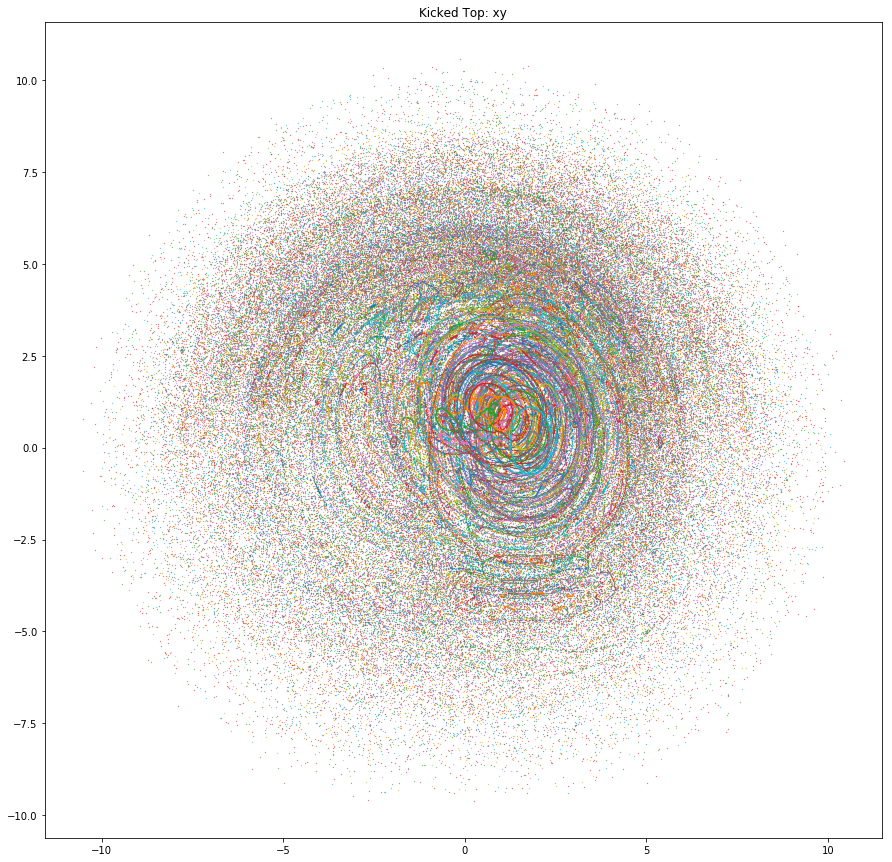

In [16]:
#ploting the mapping
plt.plot(x,y,'.', markersize=0.5)
plt.title('Kicked Top: xy')
plt.show()

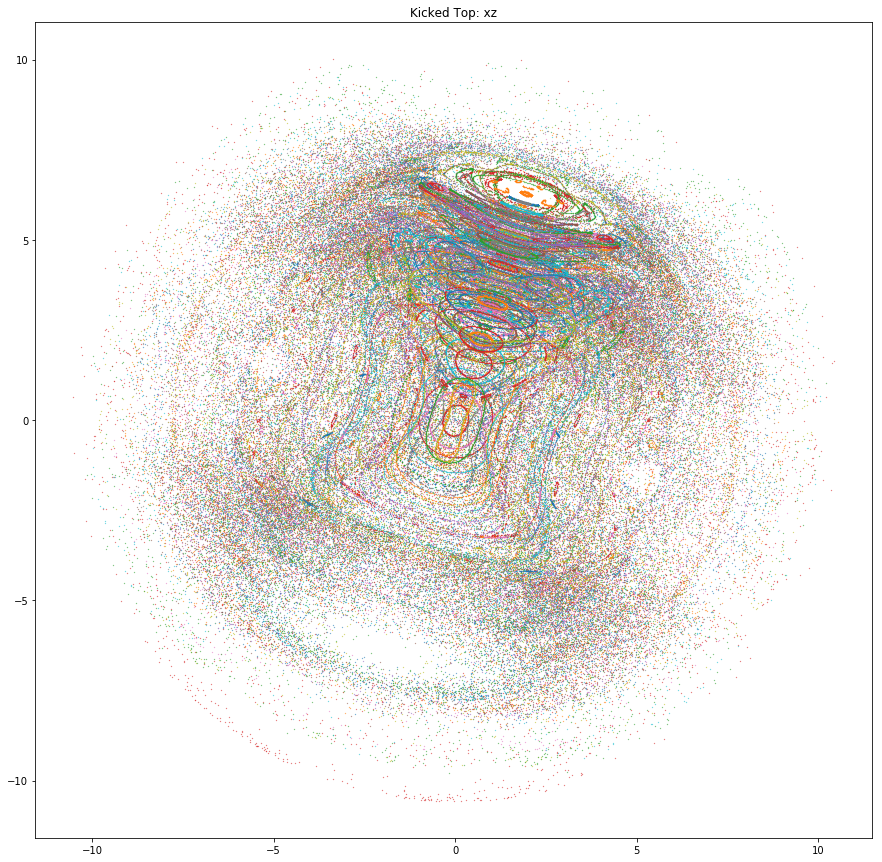

In [17]:
#ploting the mapping
plt.plot(x,z,'.', markersize=0.5)
plt.title('Kicked Top: xz')
plt.show()

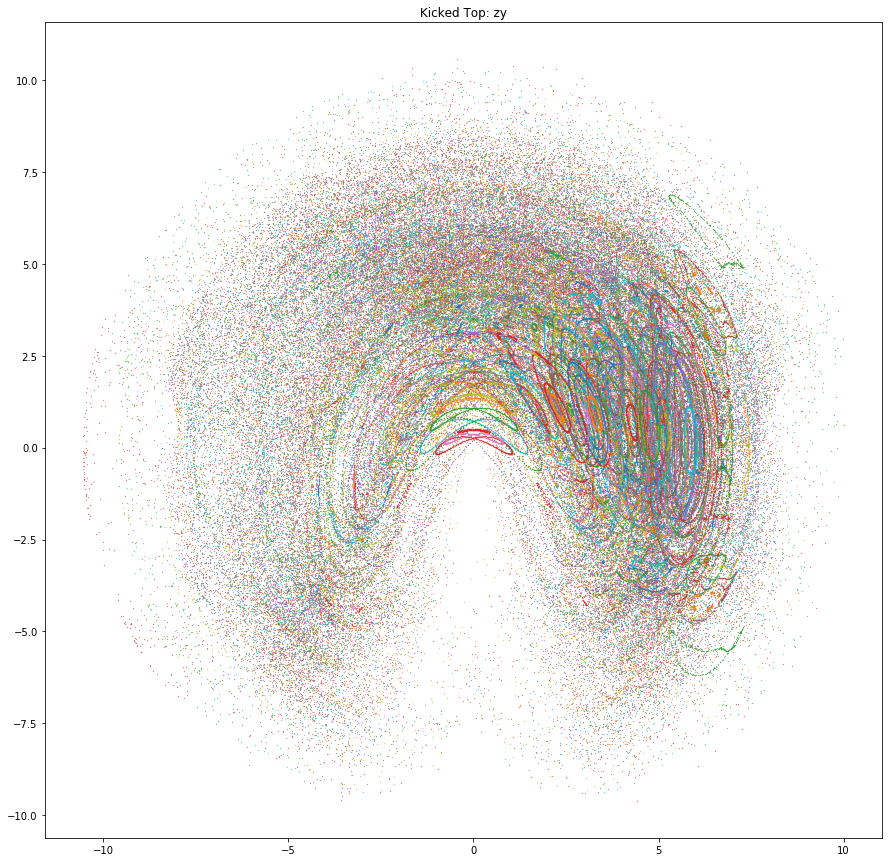

In [18]:
#ploting the mapping
plt.plot(z,y,'.', markersize=0.5)
plt.title('Kicked Top: zy')
plt.show()

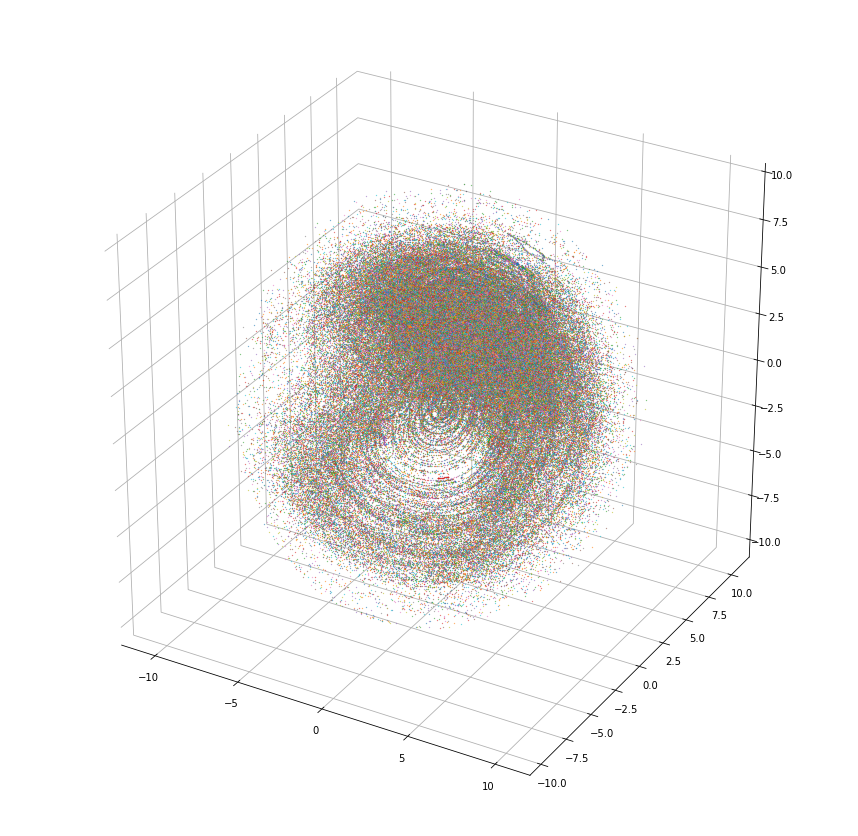

In [19]:
#ploting the 3D complete mapping
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
import mpl_toolkits.mplot3d.axes3d as p3

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection='3d')
ax.xaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.yaxis.set_pane_color((1.0,1.0,1.0,0.0))
ax.zaxis.set_pane_color((1.0,1.0,1.0,0.0))

for j in range(Traj):
    plt.plot(x[j],y[j],z[j],'.', markersize=0.5)

plt.show()